<a href="https://colab.research.google.com/github/KeremAydin98/tensorflow-documentation/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)

In [ ]:
data_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
import pathlib

data_dir = pathlib.Path(data_dir)

In [ ]:
from glob import glob

len(list(data_dir.glob("*/*.jpg")))

3670

In [ ]:
roses = list(data_dir.glob("*/*.jpg"))

In [ ]:
roses[0]

PosixPath('/root/.keras/datasets/flower_photos/daisy/14471433500_cdaa22e3ea_m.jpg')

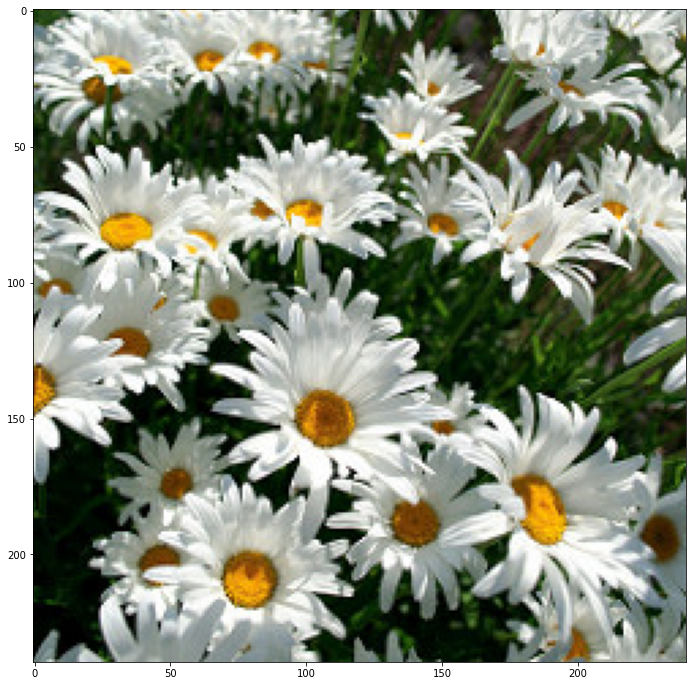

In [ ]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread(filename = str(roses[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

In [ ]:
# Create a dataset
batch_size = 32
image_size = 180

train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            label_mode="categorical",
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            image_size=(image_size, image_size),
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=42)

val_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            label_mode="categorical",
                                                            color_mode="rgb",
                                                            batch_size=batch_size,
                                                            image_size=(image_size, image_size),
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            seed=42)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(input_shape=(image_size, image_size,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, 3,  activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
    
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 89, 89, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 87, 87, 128)       147584    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 43, 43, 128)      0         
 g2D)                                                 

In [ ]:
class_names = train_dataset.class_names

In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stop])

Epoch 1/20
92/92 [==============================] - 17s 131ms/step - loss: 1.4067 - accuracy: 0.3917 - val_loss: 1.1673 - val_accuracy: 0.4319
Epoch 2/20
92/92 [==============================] - 11s 123ms/step - loss: 1.1581 - accuracy: 0.5126 - val_loss: 1.1178 - val_accuracy: 0.5300
Epoch 3/20
92/92 [==============================] - 13s 138ms/step - loss: 1.0608 - accuracy: 0.5681 - val_loss: 1.0379 - val_accuracy: 0.5749
Epoch 4/20
92/92 [==============================] - 13s 142ms/step - loss: 0.9698 - accuracy: 0.6080 - val_loss: 0.9121 - val_accuracy: 0.6621
Epoch 5/20
92/92 [==============================] - 11s 122ms/step - loss: 0.9104 - accuracy: 0.6407 - val_loss: 0.9042 - val_accuracy: 0.6349
Epoch 6/20
92/92 [==============================] - 11s 123ms/step - loss: 0.8786 - accuracy: 0.6465 - val_loss: 0.8864 - val_accuracy: 0.6594
Epoch 7/20
92/92 [==============================] - 11s 122ms/step - loss: 0.8194 - accuracy: 0.6826 - val_loss: 0.9192 - val_accuracy: 0.6662

In [ ]:
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
for image, label in train_dataset:

  print(label.shape)
  print(image.shape)
  break

(32, 5)
(32, 180, 180, 3)


In [ ]:
x,y = next(iter(train_dataset))

In [ ]:
image, label = next(iter(val_dataset))

In [ ]:
image.shape

TensorShape([32, 180, 180, 3])

In [ ]:
image[0].shape

TensorShape([180, 180, 3])

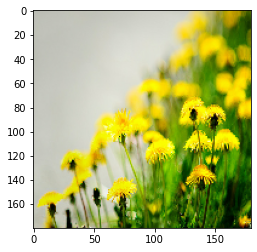

In [ ]:
plt.imshow(image[0] / 255)
plt.show()

In [ ]:
image[0].shape

TensorShape([180, 180, 3])

In [ ]:
tf.argmax(model.predict(tf.expand_dims(image[0],0)), -1)

1/1 [==============================] - 0s 17ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([3])>

In [ ]:
 class_names[int(tf.argmax(label[0],-1))]

'dandelion'

1/1 [==============================] - 0s 23ms/step


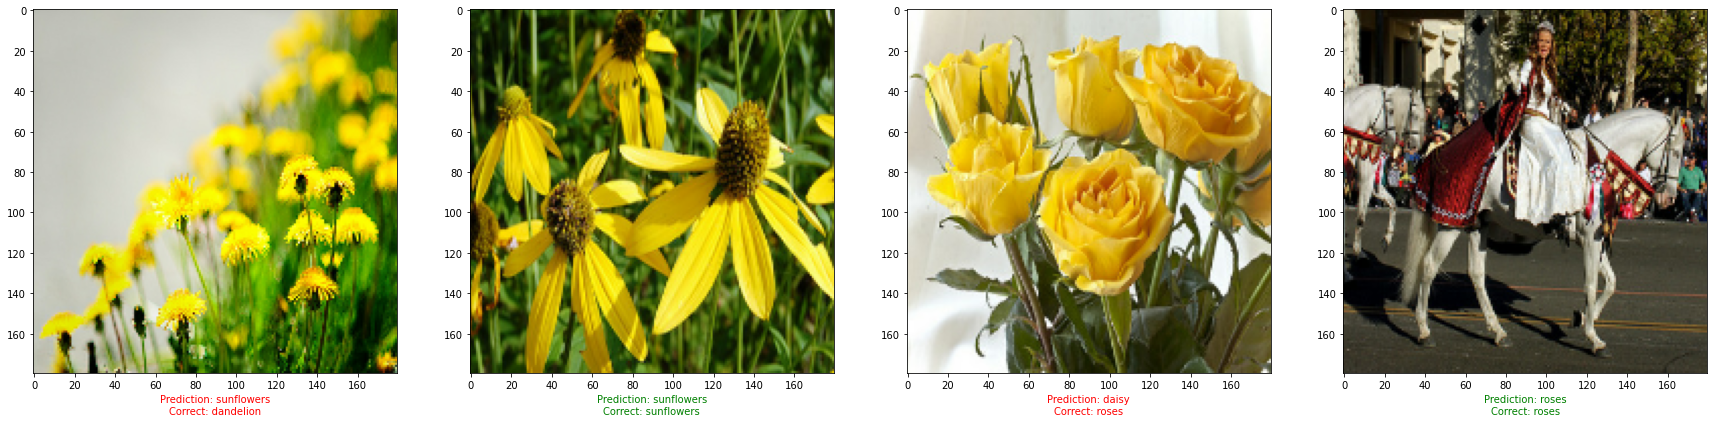

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(30,30))
for i in range(4):

  pred = model.predict(tf.expand_dims(image[i],0))
  prediction = class_names[int(tf.argmax(pred,-1))]

  correct_label = class_names[int(tf.argmax(label[i],-1))]

  if prediction == correct_label:

    color = "green"

  else:

    color = "red"

  ax[i].imshow(image[i] / 255)
  ax[i].set_xlabel(f"Prediction: {prediction}\nCorrect: {correct_label}")
  ax[i].xaxis.label.set_color(color)

plt.show()